In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error

In [ ]:
# Step 1: Read CSV File
agriculture_df = pd.read_csv("final_1.csv")
# print(df.columns)
agriculture_df

,Dist_Code,Year,State_Code,State_Name,Dist_Name,Rice_Area,RICE_PRODUCTION,ANNUAL_RAIN,avg_rain,Nitrogen,POTASH,PHOSPHATE,DYSTROPEPTS,FLUVENTS,INCEPTISOLS,LOAMY_ALFISOL,ORTHENTS,ORTHIDS,PSAMMENTS,SANDY_ALFISOL,UDALFS,UDOLLS_UDALFS,UDUPTS_UDALFS,USTALF_USTOLLS,USTALFS,VERTIC_SOILS,VERTISOLS,RICE_YIELD
0,1,2005,14,Chhattisgarh,Durg,775.99,984.31,1103.9,62.533333,52888,10466,23912,0,0,0.0,6.000000e-09,0,0,0.0,0.0,0,0.0,0.0,0.4,0,0.0,0.0,1268.46
1,1,2006,14,Chhattisgarh,Durg,781.70,1177.10,886.4,52.891667,63978,12392,30775,0,0,0.0,6.000000e-09,0,0,0.0,0.0,0,0.0,0.0,0.4,0,0.0,0.0,1505.81
2,1,2007,14,Chhattisgarh,Durg,799.89,1095.84,1068.5,64.175000,60332,11458,27558,0,0,0.0,6.000000e-09,0,0,0.0,0.0,0,0.0,0.0,0.4,0,0.0,0.0,1369.98
3,1,2008,14,Chhattisgarh,Durg,803.37,704.09,904.8,63.875000,52406,17602,33857,0,0,0.0,6.000000e-09,0,0,0.0,0.0,0,0.0,0.0,0.4,0,0.0,0.0,876.42
4,1,2009,14,Chhattisgarh,Durg,789.04,622.05,695.7,24.208333,72854,18091,41199,0,0,0.0,6.000000e-09,0,0,0.0,0.0,0,0.0,0.0,0.4,0,0.0,0.0,788.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,917,2011,15,Jharkhand,Singhbhum,253.68,485.46,1578.1,113.875000,2144,124,513,0,0,0.0,0.000000e+00,0,0,0.0,0.0,0,0.0,0.0,1.0,0,0.0,0.0,1913.67
3206,917,2012,15,Jharkhand,Singhbhum,263.85,517.22,1176.5,73.741667,3763,47,304,0,0,0.0,0.000000e+00,0,0,0.0,0.0,0,0.0,0.0,1.0,0,0.0,0.0,1960.28
3207,917,2013,15,Jharkhand,Singhbhum,267.06,579.70,1626.4,111.600000,3796,43,392,0,0,0.0,0.000000e+00,0,0,0.0,0.0,0,0.0,0.0,1.0,0,0.0,0.0,2170.67
3208,917,2014,15,Jharkhand,Singhbhum,256.33,586.63,1431.2,88.866667,2925,14,327,0,0,0.0,0.000000e+00,0,0,0.0,0.0,0,0.0,0.0,1.0,0,0.0,0.0,2288.57


In [ ]:
agriculture_df.shape
agriculture_df.columns

Index(['Dist_Code', 'Year', 'State_Code', 'State_Name', 'Dist_Name',
       'Rice_Area', 'RICE_PRODUCTION', 'ANNUAL_RAIN', 'avg_rain', 'Nitrogen',
       'POTASH', 'PHOSPHATE', 'DYSTROPEPTS', 'FLUVENTS', 'INCEPTISOLS',
       'LOAMY_ALFISOL', 'ORTHENTS', 'ORTHIDS', 'PSAMMENTS', 'SANDY_ALFISOL',
       'UDALFS', 'UDOLLS_UDALFS', 'UDUPTS_UDALFS', 'USTALF_USTOLLS', 'USTALFS',
       'VERTIC_SOILS', 'VERTISOLS', 'RICE_YIELD'],
      dtype='object')

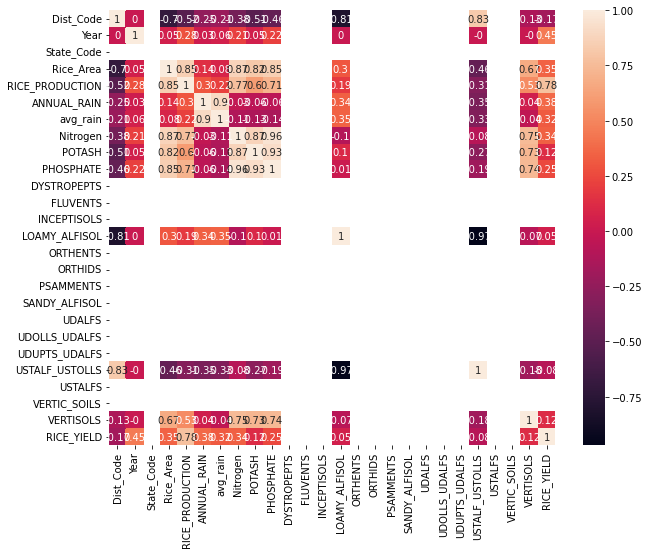

In [ ]:
cgh = agriculture_df.loc[agriculture_df.State_Name == "Chhattisgarh"]


corr_mat_cgh = cgh.corr()
corr_mat_cgh

plt.figure(figsize=(10,8))
plot = sns.heatmap(cgh.corr().round(2), annot = True)

In [ ]:
clean_df = agriculture_df.drop(['Dist_Code','State_Code','DYSTROPEPTS', 'FLUVENTS', 'INCEPTISOLS', 'ORTHENTS', 'ORTHIDS', 'PSAMMENTS', 'SANDY_ALFISOL', 'UDALFS', 'UDOLLS_UDALFS', 'UDUPTS_UDALFS', 'USTALFS','VERTIC_SOILS'], axis = 1)

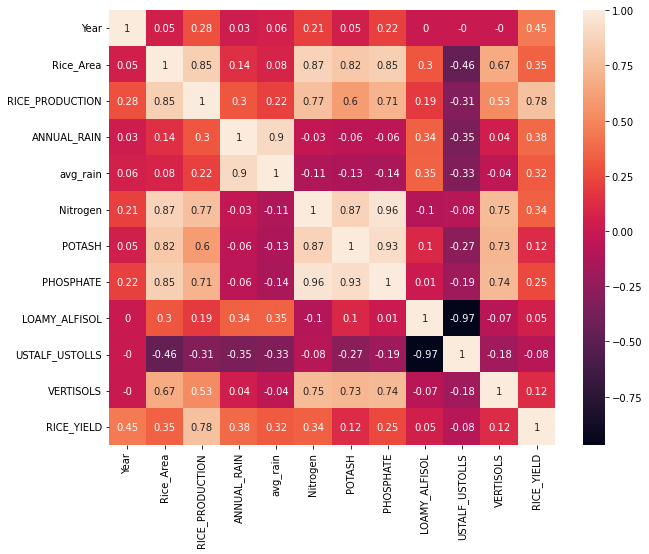

In [ ]:
cgh = clean_df.loc[clean_df.State_Name == "Chhattisgarh"]


corr_mat_cgh = cgh.corr()
corr_mat_cgh

plt.figure(figsize=(10,8))
plot = sns.heatmap(cgh.corr().round(2), annot = True)

In [ ]:
clean_df
clean_df.to_csv("clean_df.csv")

In [ ]:
# from google.colab import files
# files.download("clean_df.csv")

In [ ]:
clean_df.isna()
clean_df.isnull()
clean_df.describe()

,Year,Rice_Area,RICE_PRODUCTION,ANNUAL_RAIN,avg_rain,Nitrogen,POTASH,PHOSPHATE,LOAMY_ALFISOL,USTALF_USTOLLS,VERTISOLS,RICE_YIELD
count,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3.210000e+03,3210.000000,3210.000000,3210.000000
mean,2009.997196,140.492022,326.174866,1091.543956,67.424621,50364.139564,8452.397819,20331.420249,2.364486e-10,0.079782,0.041745,1942.880327
std,3.240874,168.561252,428.686187,717.574265,46.661133,44228.515055,10587.015218,17544.594327,1.171961e-09,0.247982,0.124714,1089.145597
min,2005.000000,0.000000,0.000000,-1.000000,-0.916667,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2007.000000,10.750000,15.905000,621.075000,36.397917,16705.500000,1381.000000,7353.500000,0.000000e+00,0.000000,0.000000,1188.712500
50%,2010.000000,86.055000,173.305000,917.950000,55.345833,40901.500000,4302.000000,16735.000000,0.000000e+00,0.000000,0.000000,2026.375000
75%,2013.000000,212.642500,463.302500,1327.825000,84.289583,73348.250000,11420.750000,28258.250000,0.000000e+00,0.000000,0.000000,2623.012500
max,2015.000000,1154.230000,3215.010000,5007.000000,368.241667,324722.000000,67656.000000,138441.000000,1.000000e-08,1.000000,0.800000,5653.830000


In [ ]:
clean_df

,Year,State_Name,Dist_Name,Rice_Area,RICE_PRODUCTION,ANNUAL_RAIN,avg_rain,Nitrogen,POTASH,PHOSPHATE,LOAMY_ALFISOL,USTALF_USTOLLS,VERTISOLS,RICE_YIELD
0,2005,Chhattisgarh,Durg,775.99,984.31,1103.9,62.533333,52888,10466,23912,6.000000e-09,0.4,0.0,1268.46
1,2006,Chhattisgarh,Durg,781.70,1177.10,886.4,52.891667,63978,12392,30775,6.000000e-09,0.4,0.0,1505.81
2,2007,Chhattisgarh,Durg,799.89,1095.84,1068.5,64.175000,60332,11458,27558,6.000000e-09,0.4,0.0,1369.98
3,2008,Chhattisgarh,Durg,803.37,704.09,904.8,63.875000,52406,17602,33857,6.000000e-09,0.4,0.0,876.42
4,2009,Chhattisgarh,Durg,789.04,622.05,695.7,24.208333,72854,18091,41199,6.000000e-09,0.4,0.0,788.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,2011,Jharkhand,Singhbhum,253.68,485.46,1578.1,113.875000,2144,124,513,0.000000e+00,1.0,0.0,1913.67
3206,2012,Jharkhand,Singhbhum,263.85,517.22,1176.5,73.741667,3763,47,304,0.000000e+00,1.0,0.0,1960.28
3207,2013,Jharkhand,Singhbhum,267.06,579.70,1626.4,111.600000,3796,43,392,0.000000e+00,1.0,0.0,2170.67
3208,2014,Jharkhand,Singhbhum,256.33,586.63,1431.2,88.866667,2925,14,327,0.000000e+00,1.0,0.0,2288.57


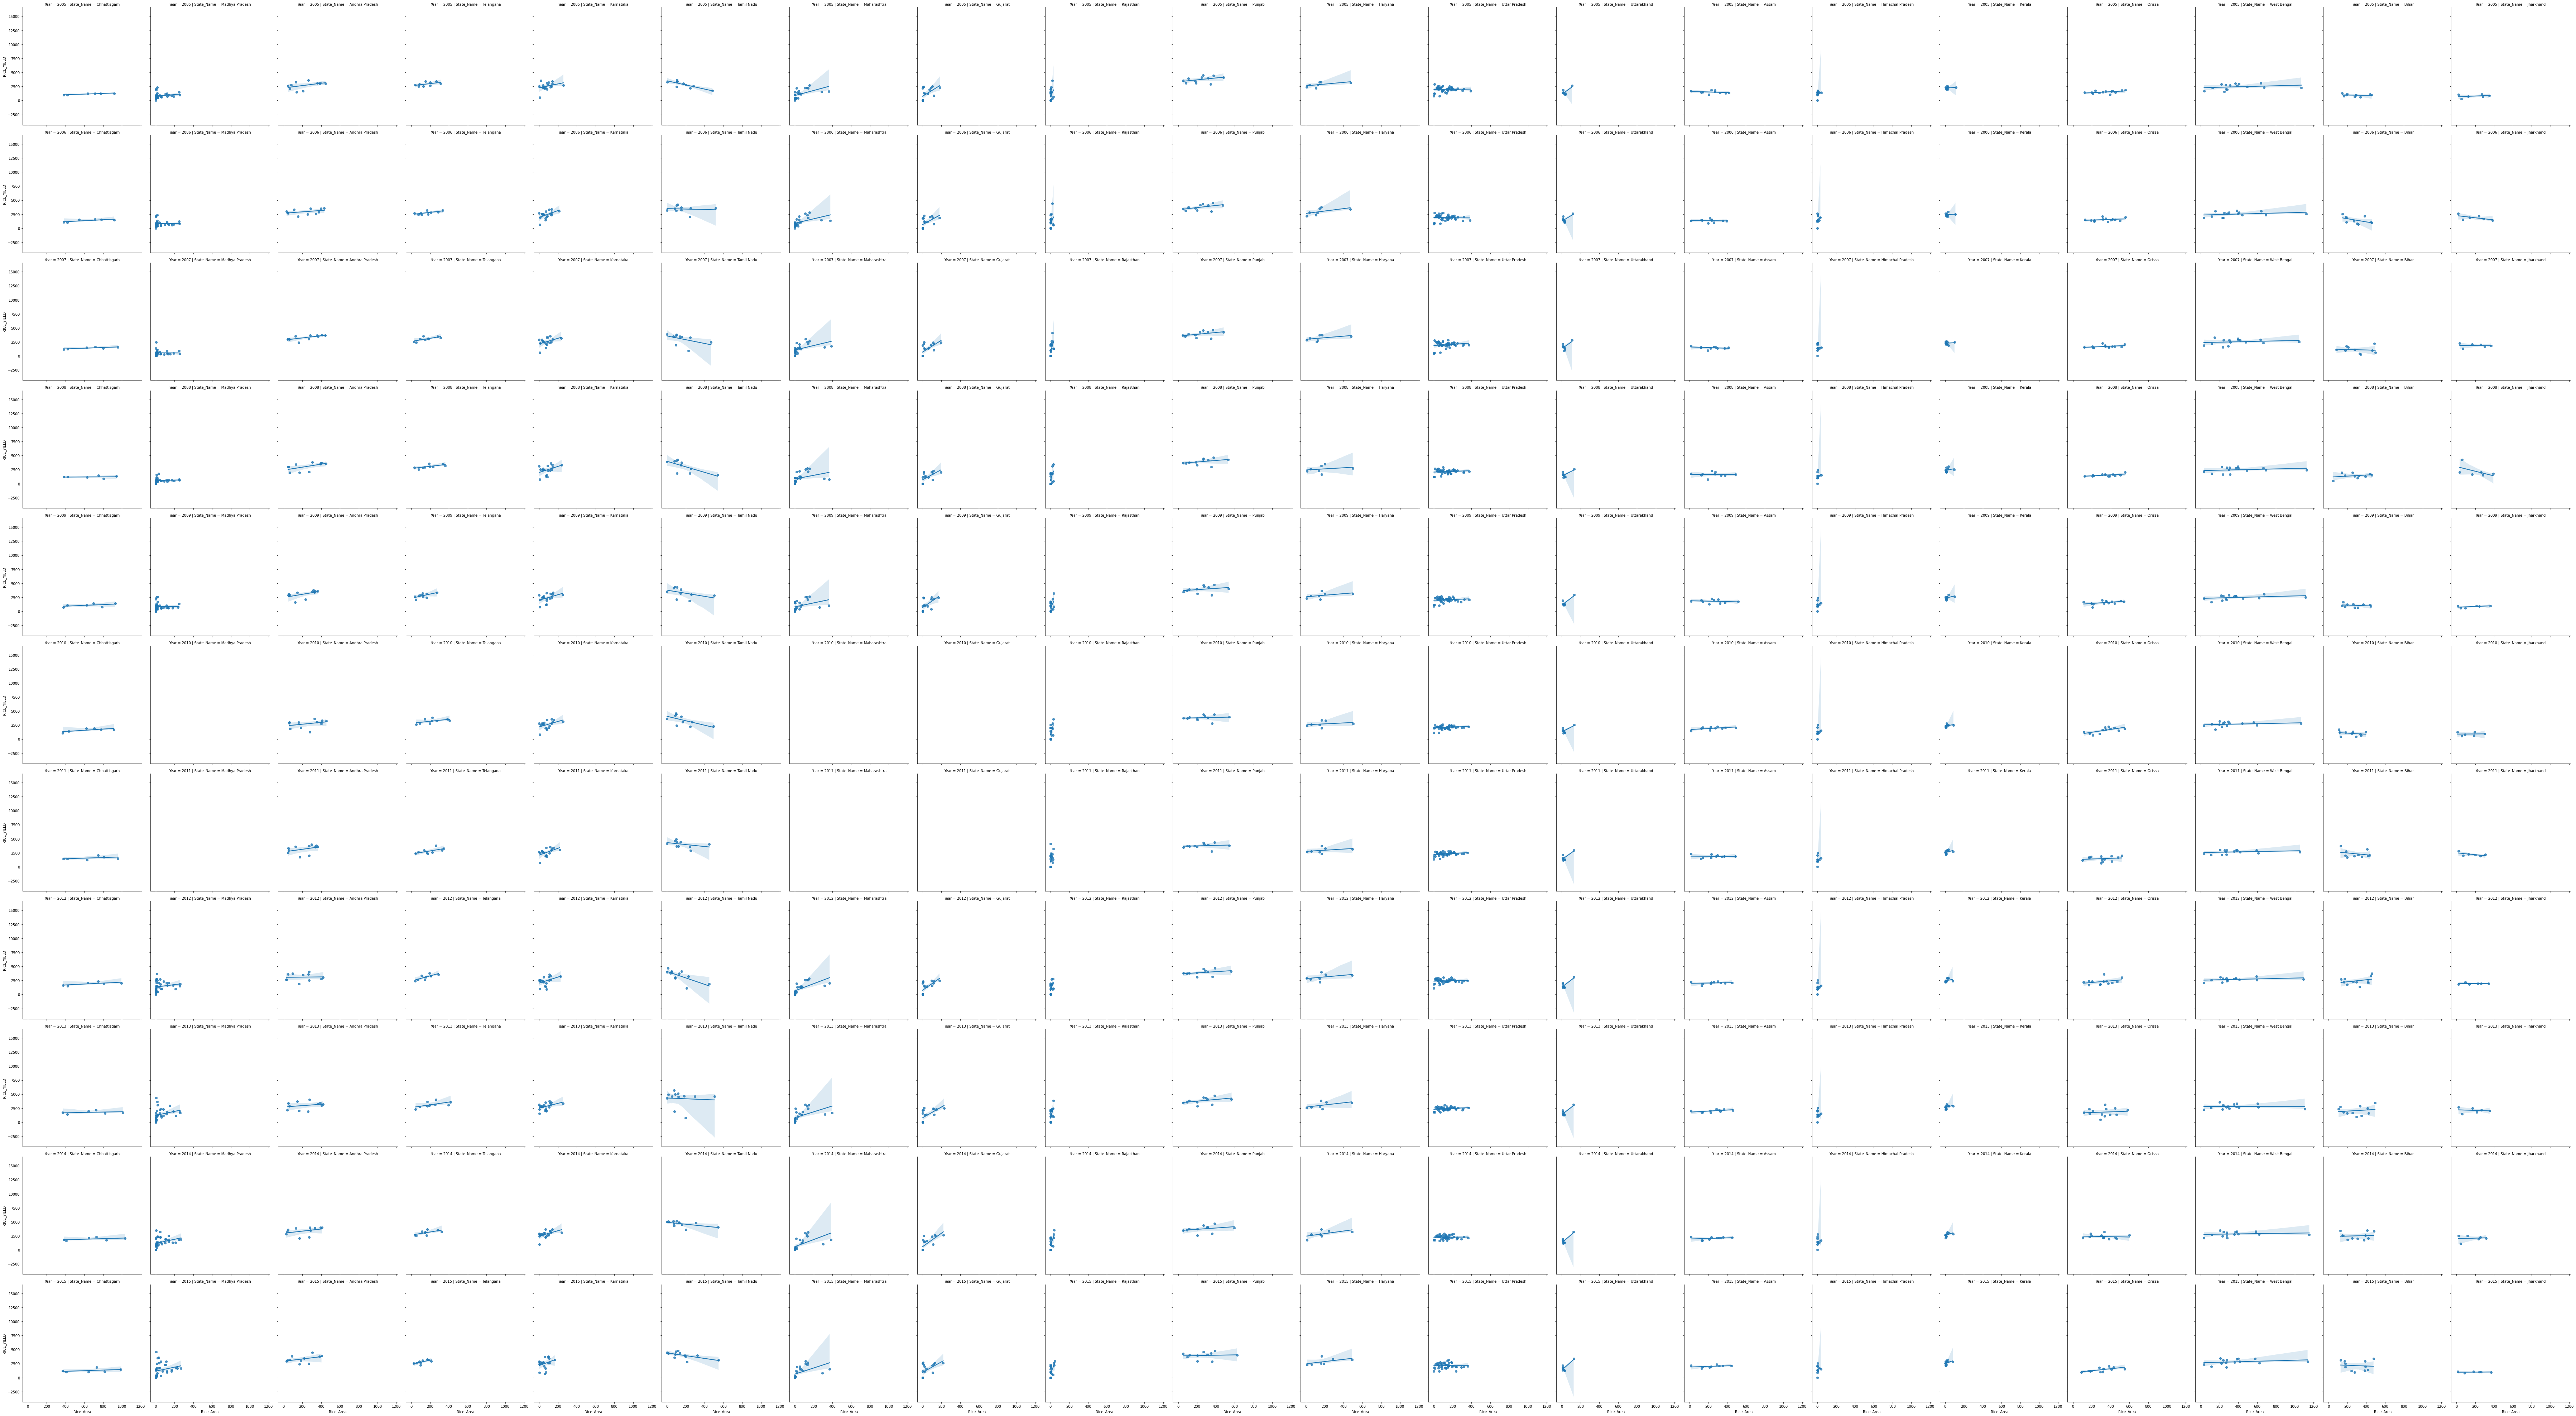

In [ ]:
# visualization 
# import matplotlib.pyplot as plt
# plt.plot(clean_df['Rice_Area'], clean_df['RICE_YIELD'])
# plt.show()

# sns.catplot(data=clean_df, kind = "strip", x="Rice_Area", y="RICE_YIELD")
# sns.displot(data=clean_df, kind = "kde", x="RICE_YIELD", col="YEAR")
sns.lmplot(data=clean_df, x="Rice_Area", y="RICE_YIELD", col="State_Name", row="Year")

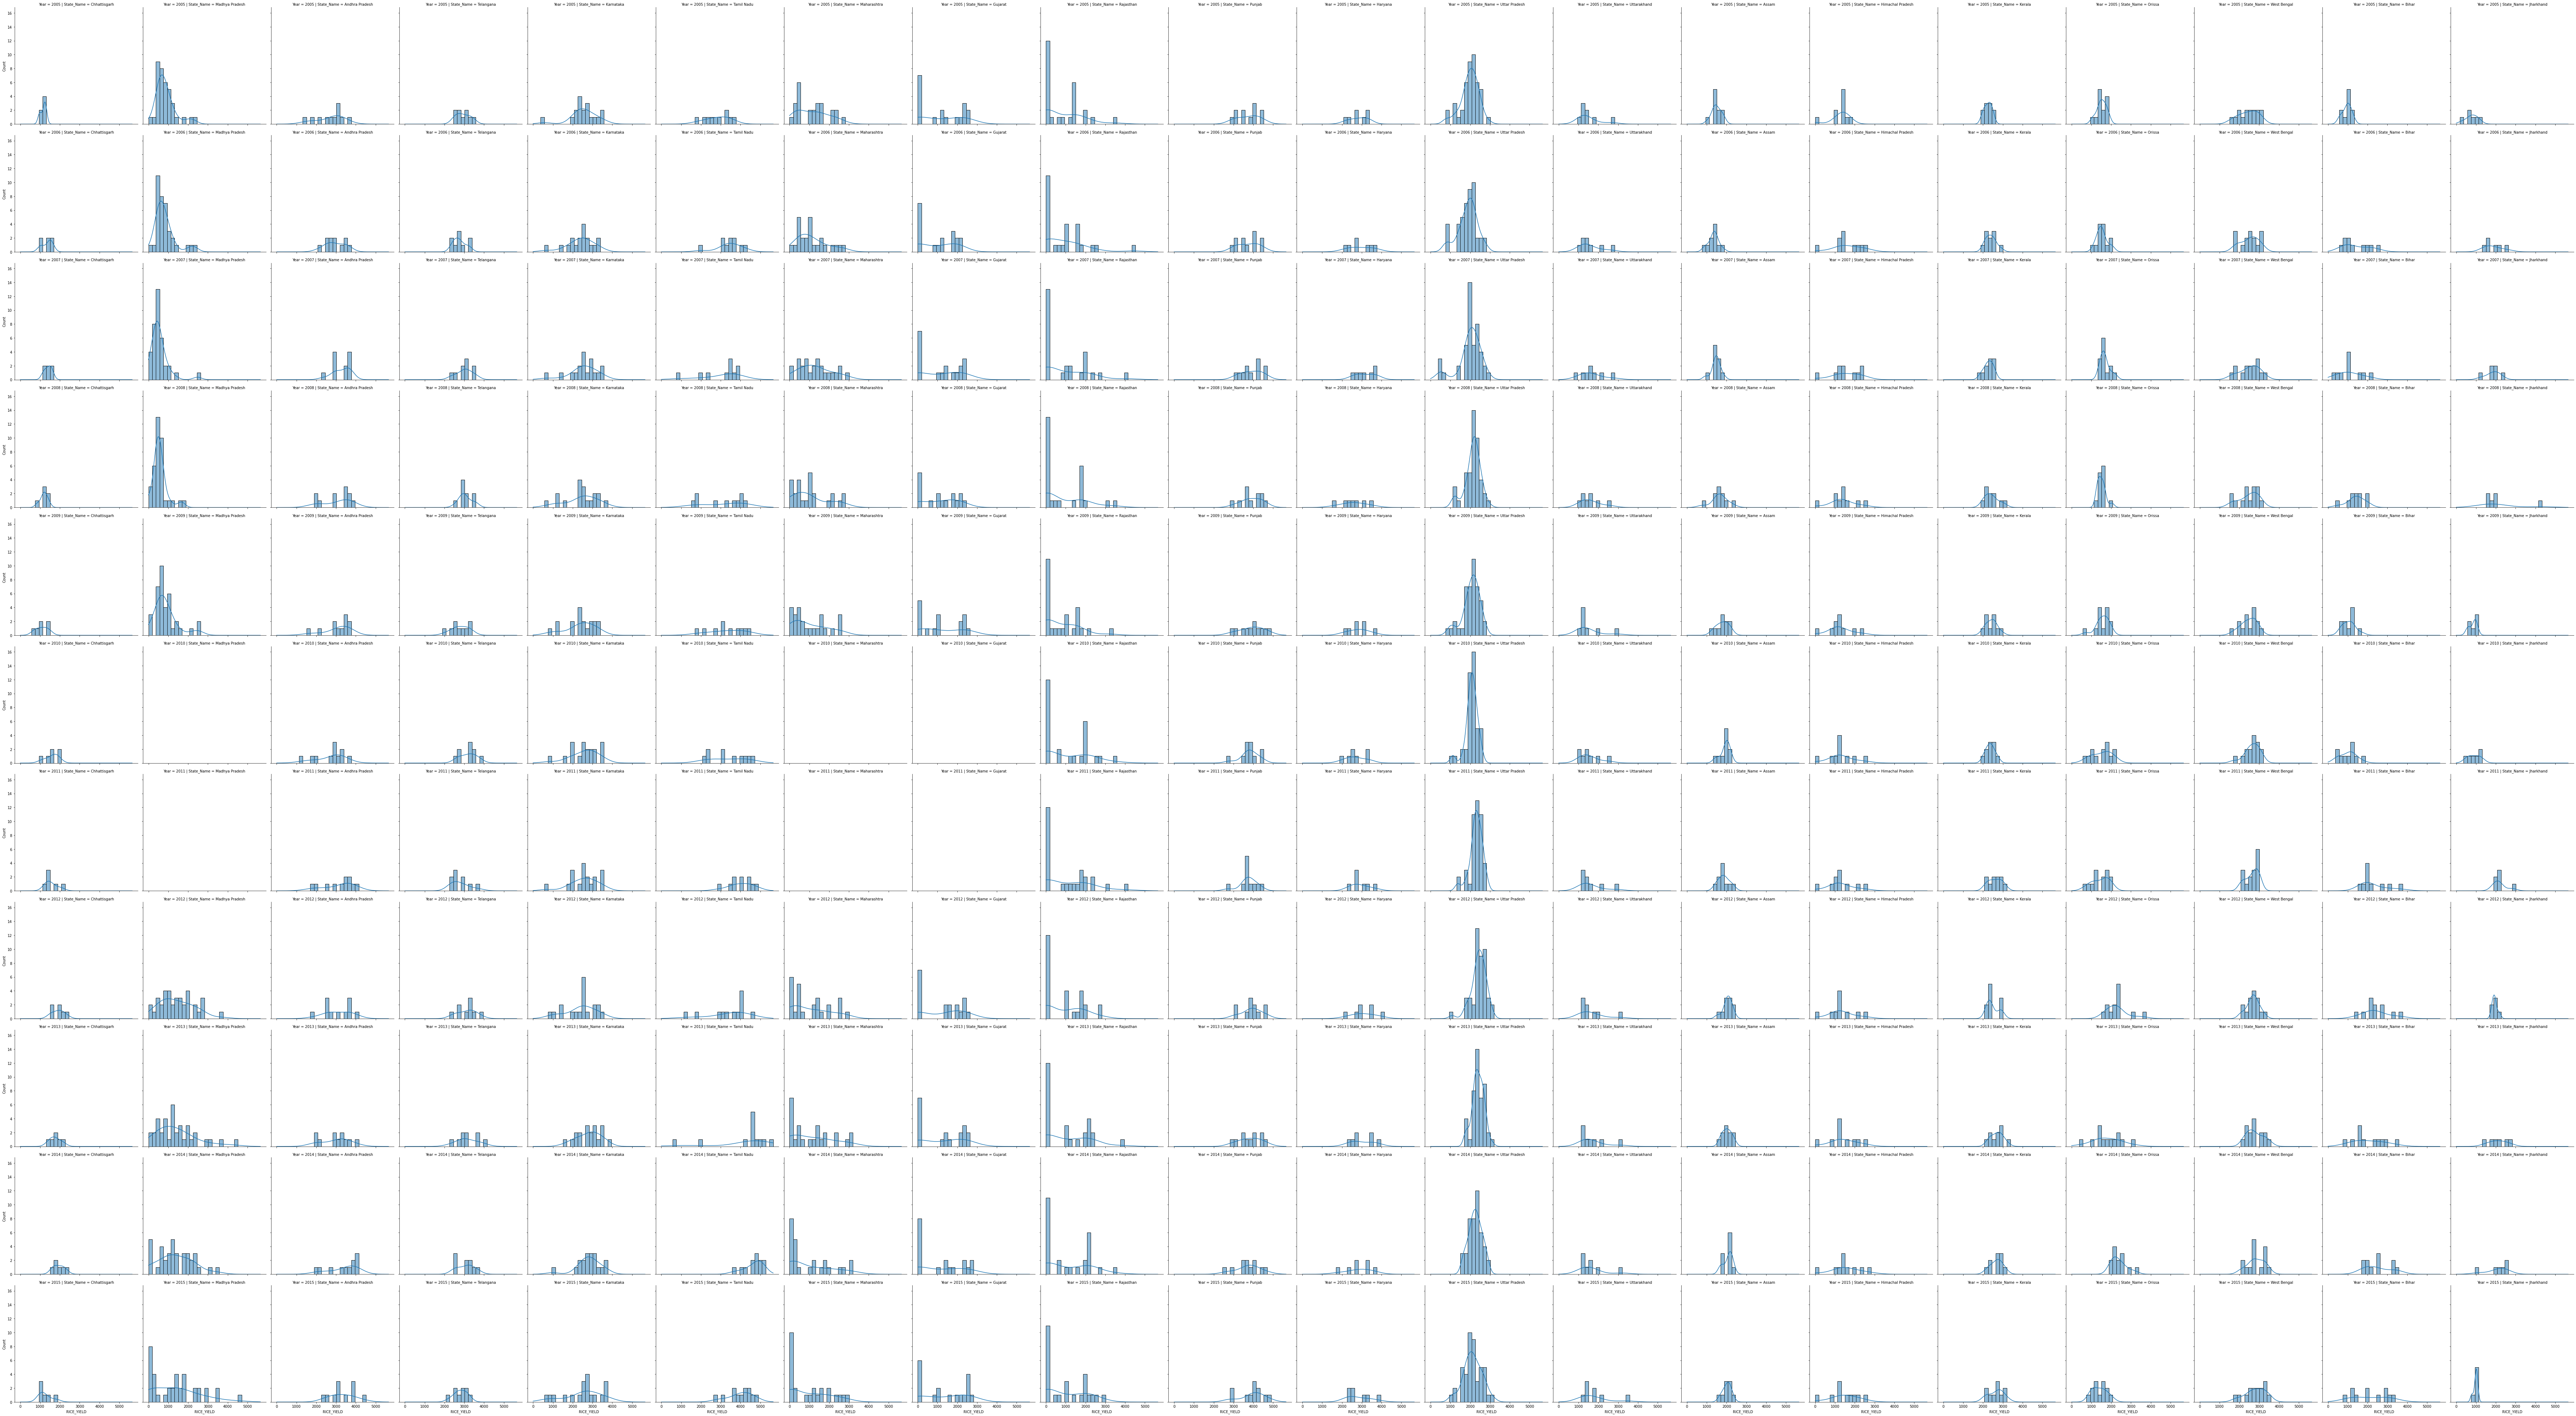

In [ ]:
sns.displot(data=clean_df, kde=True, x="RICE_YIELD", col="State_Name", row="Year")

In [ ]:
# plt.plot(clean_df['RICE_PRODUCTION'].head(50), clean_df['RICE_YIELD'].head(50))
# plt.show()
sns.regplot(data=clean_df, x="RICE_PRODUCTION", y="RICE_YIELD")

In [ ]:
# Bar chart with RICE_YEILD against NITROGEN
# plt.scatter(clean_df['Nitrogen'].head(100), clean_df['RICE_YIELD'].head(100))
  
# plt.title("Bar Chart")
  
# # Setting the X and Y labels
# plt.xlabel('Nitrogen')
# plt.ylabel('RICE_YIELD')
  
# # Adding the legends
# plt.show()
sns.regplot(data=clean_df, x="Nitrogen", y="RICE_YIELD")

In [ ]:
# Bar chart with RICE_YEILD against POTASH
# plt.scatter(clean_df['POTASH'].head(100), clean_df['RICE_YIELD'].head(100))
  
# plt.title("Bar Chart")
  
# # Setting the X and Y labels
# plt.xlabel('Potash')
# plt.ylabel('RICE_YIELD')
  
# # Adding the legends
# plt.show()
sns.regplot(data=clean_df, x="POTASH", y="RICE_YIELD")

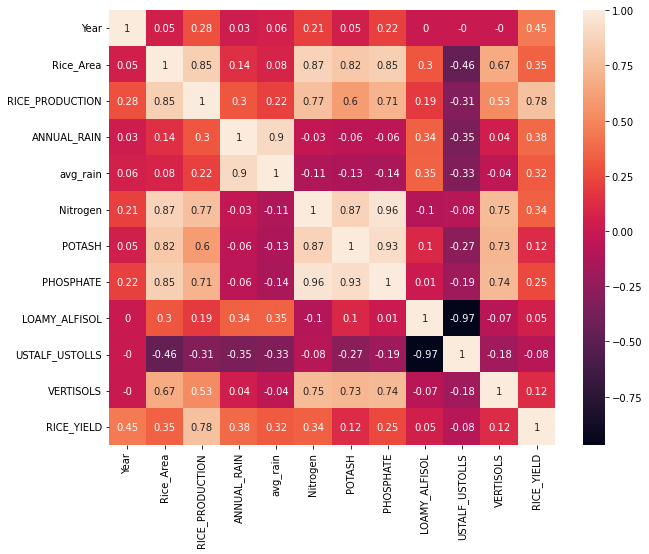

In [ ]:
cgh = clean_df.loc[clean_df.State_Name == "Chhattisgarh"]


corr_mat_cgh = cgh.corr()
corr_mat_cgh

plt.figure(figsize=(10,8))
plot = sns.heatmap(cgh.corr().round(2), annot = True)

In [ ]:
clean_df

,Year,State_Name,Dist_Name,Rice_Area,RICE_PRODUCTION,ANNUAL_RAIN,avg_rain,Nitrogen,POTASH,PHOSPHATE,LOAMY_ALFISOL,USTALF_USTOLLS,VERTISOLS,RICE_YIELD
0,2005,Chhattisgarh,Durg,775.99,984.31,1103.9,62.533333,52888,10466,23912,6.000000e-09,0.4,0.0,1268.46
1,2006,Chhattisgarh,Durg,781.70,1177.10,886.4,52.891667,63978,12392,30775,6.000000e-09,0.4,0.0,1505.81
2,2007,Chhattisgarh,Durg,799.89,1095.84,1068.5,64.175000,60332,11458,27558,6.000000e-09,0.4,0.0,1369.98
3,2008,Chhattisgarh,Durg,803.37,704.09,904.8,63.875000,52406,17602,33857,6.000000e-09,0.4,0.0,876.42
4,2009,Chhattisgarh,Durg,789.04,622.05,695.7,24.208333,72854,18091,41199,6.000000e-09,0.4,0.0,788.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,2011,Jharkhand,Singhbhum,253.68,485.46,1578.1,113.875000,2144,124,513,0.000000e+00,1.0,0.0,1913.67
3206,2012,Jharkhand,Singhbhum,263.85,517.22,1176.5,73.741667,3763,47,304,0.000000e+00,1.0,0.0,1960.28
3207,2013,Jharkhand,Singhbhum,267.06,579.70,1626.4,111.600000,3796,43,392,0.000000e+00,1.0,0.0,2170.67
3208,2014,Jharkhand,Singhbhum,256.33,586.63,1431.2,88.866667,2925,14,327,0.000000e+00,1.0,0.0,2288.57


In [ ]:
# choosing feature(X) and target(y) variables
X = clean_df.drop(['Year','State_Name', 'Dist_Name', 'RICE_YIELD'], axis = 1)
y = clean_df['RICE_YIELD']

In [ ]:
X

,Rice_Area,RICE_PRODUCTION,ANNUAL_RAIN,avg_rain,Nitrogen,POTASH,PHOSPHATE,LOAMY_ALFISOL,USTALF_USTOLLS,VERTISOLS
0,775.99,984.31,1103.9,62.533333,52888,10466,23912,6.000000e-09,0.4,0.0
1,781.70,1177.10,886.4,52.891667,63978,12392,30775,6.000000e-09,0.4,0.0
2,799.89,1095.84,1068.5,64.175000,60332,11458,27558,6.000000e-09,0.4,0.0
3,803.37,704.09,904.8,63.875000,52406,17602,33857,6.000000e-09,0.4,0.0
4,789.04,622.05,695.7,24.208333,72854,18091,41199,6.000000e-09,0.4,0.0
...,...,...,...,...,...,...,...,...,...,...
3205,253.68,485.46,1578.1,113.875000,2144,124,513,0.000000e+00,1.0,0.0
3206,263.85,517.22,1176.5,73.741667,3763,47,304,0.000000e+00,1.0,0.0
3207,267.06,579.70,1626.4,111.600000,3796,43,392,0.000000e+00,1.0,0.0
3208,256.33,586.63,1431.2,88.866667,2925,14,327,0.000000e+00,1.0,0.0


In [ ]:
y

0       1268.46
1       1505.81
2       1369.98
3        876.42
4        788.37
         ...   
3205    1913.67
3206    1960.28
3207    2170.67
3208    2288.57
3209    1005.70
Name: RICE_YIELD, Length: 3210, dtype: float64

In [ ]:
# train and test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 1.42849703,  0.75977403,  0.08028643, ..., -0.20393377,
        -0.32361381, -0.33189677],
       [-0.74949321, -0.7531899 , -0.28480553, ..., -0.20393377,
        -0.32361381,  2.84985179],
       [ 0.18876257,  0.21788252,  0.16934002, ..., -0.20393377,
        -0.32361381, -0.33189677],
       ...,
       [-0.8437053 , -0.76905129, -0.69303715, ..., -0.20393377,
        -0.32361381,  1.25897751],
       [-0.26907195, -0.33343112, -0.50841048, ..., -0.20393377,
        -0.32361381, -0.33189677],
       [-0.71023817, -0.62767182,  0.25284509, ..., -0.20393377,
         3.62338344, -0.33189677]])

In [ ]:
def prediction(model, X_train, y_train, X_test, y_test):
  model.fit(X_train,y_train)
  predictions = model.predict(X_test)
  print("R2 Score (r2_score): {:.4f} ~ {:.2f}%".format(r2_score(y_test,predictions), r2_score(y_test,predictions)*100))     # Higher is Good, 1.0 is best
  fig, ax = plt.subplots()
  ax.scatter(y_test, predictions)
  ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
  ax.set_xlabel('Actual')
  ax.set_ylabel('Predicted')
  print("Mean Square Error (MSE): {:.2f}".format(mean_squared_error(y_test, predictions)))                                  # Lower is Good
  print("Root Mean Square Error (RMSE): {:.2f}".format(math.sqrt(mean_squared_error(y_test, predictions))))                 # Lower is Good, 0 is best, RMSE >= MAE
  print("Mean Absolute Error (MAE): {:.2f}".format(mean_absolute_error(y_test, predictions)))                               # Lower is Good, 0 is best
  print("Explained Variance: {:.2f}".format(explained_variance_score(y_test, predictions)))                                 # Higher is Good, 1.0 is best
  print("Max Error: {:.2f}".format(max_error(y_test, predictions)))                                                         # Lower is Good, 0 is best, Highest Difference b/w y_test & predictions


Using "Linear Regression" as Machine Learning Regression Algorithm:- 
R2 Score (r2_score): 0.4734 ~ 47.34%
Mean Square Error (MSE): 638219.94
Root Mean Square Error (RMSE): 798.89
Mean Absolute Error (MAE): 608.41
Explained Variance: 0.48
Max Error: 3005.25


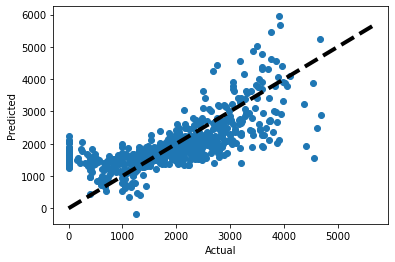

In [ ]:
model = LinearRegression()
print("\nUsing \"Linear Regression\" as Machine Learning Regression Algorithm:- ")
prediction(model, X_train, y_train, X_test, y_test)


Using "Polynomial Regression" as Machine Learning Regression Algorithm:- 
R2 Score (r2_score): 0.6718 ~ 67.18%
Mean Square Error (MSE): 397832.23
Root Mean Square Error (RMSE): 630.74
Mean Absolute Error (MAE): 462.40
Explained Variance: 0.68
Max Error: 3225.99


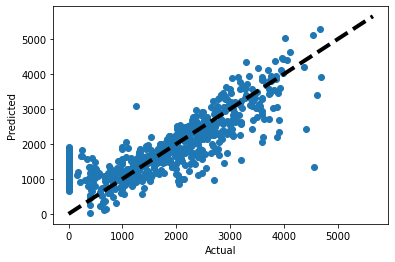

In [ ]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression())])
print("\nUsing \"Polynomial Regression\" as Machine Learning Regression Algorithm:- ")
prediction(model, X_train, y_train, X_test, y_test)


Using "Random Forest" as Machine Learning Regression Algorithm:- 
R2 Score (r2_score): 0.9634 ~ 96.34%
Mean Square Error (MSE): 44334.77
Root Mean Square Error (RMSE): 210.56
Mean Absolute Error (MAE): 139.25
Explained Variance: 0.96
Max Error: 1235.51


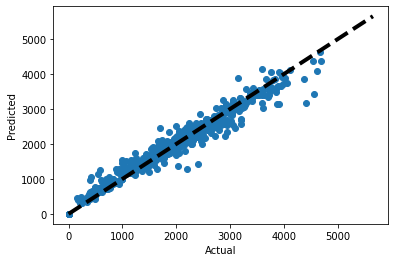

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=20, criterion='squared_error',)
print("\nUsing \"Random Forest\" as Machine Learning Regression Algorithm:- ")
prediction(model, X_train, y_train, X_test, y_test)


Using "Decision Tree" as Machine Learning Regression Algorithm:- 
R2 Score (r2_score): 0.9036 ~ 90.36%
Mean Square Error (MSE): 116898.13
Root Mean Square Error (RMSE): 341.90
Mean Absolute Error (MAE): 231.82
Explained Variance: 0.90
Max Error: 1983.28


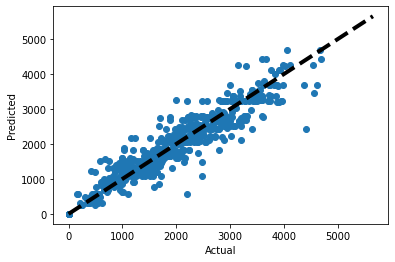

In [ ]:
model = DecisionTreeRegressor(max_depth=10)
print("\nUsing \"Decision Tree\" as Machine Learning Regression Algorithm:- ")
prediction(model, X_train, y_train, X_test, y_test)


Using "XG Boost" as Machine Learning Regression Algorithm:- 
[10:27:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score (r2_score): 0.9821 ~ 98.21%
Mean Square Error (MSE): 21689.21
Root Mean Square Error (RMSE): 147.27
Mean Absolute Error (MAE): 95.74
Explained Variance: 0.98
Max Error: 1041.31


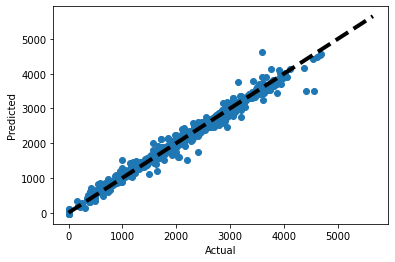

In [ ]:
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
print("\nUsing \"XG Boost\" as Machine Learning Regression Algorithm:- ")
prediction(model, X_train, y_train, X_test, y_test)


Using "Robust Regression (RANSAC)" as Machine Learning Regression Algorithm:- 
R2 Score (r2_score): 0.4734 ~ 47.34%
Mean Square Error (MSE): 638219.94
Root Mean Square Error (RMSE): 798.89
Mean Absolute Error (MAE): 608.41
Explained Variance: 0.48
Max Error: 3005.25


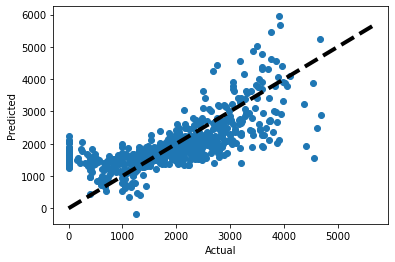

In [ ]:
model = RANSACRegressor(LinearRegression(), max_trials=1000, min_samples=500, residual_threshold=5000)
print("\nUsing \"Robust Regression (RANSAC)\" as Machine Learning Regression Algorithm:- ")
prediction(model, X_train, y_train, X_test, y_test)


Using "ElasticNet" as Machine Learning Regression Algorithm:- 
R2 Score (r2_score): 0.3479 ~ 34.79%
Mean Square Error (MSE): 790411.03
Root Mean Square Error (RMSE): 889.05
Mean Absolute Error (MAE): 701.10
Explained Variance: 0.36
Max Error: 2991.68


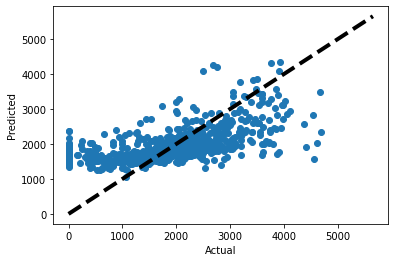

In [ ]:
model = ElasticNet()
print("\nUsing \"ElasticNet\" as Machine Learning Regression Algorithm:- ")
prediction(model, X_train, y_train, X_test, y_test)


Using "Bayesian Ridge" as Machine Learning Regression Algorithm:- 
R2 Score (r2_score): 0.4738 ~ 47.38%
Mean Square Error (MSE): 637763.01
Root Mean Square Error (RMSE): 798.60
Mean Absolute Error (MAE): 608.03
Explained Variance: 0.48
Max Error: 3005.58


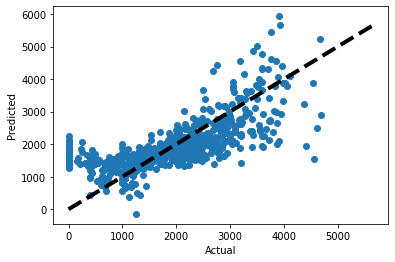

In [ ]:
model = BayesianRidge()
print("\nUsing \"Bayesian Ridge\" as Machine Learning Regression Algorithm:- ")
prediction(model, X_train, y_train, X_test, y_test)